In [3]:
] add Luxor LaTeXStrings

    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General`
   Resolving package versions...
    Updating `~/Research/SimilaritySearchExamples/metric-search/Project.toml`
  [b964fa9f] + LaTeXStrings v1.2.1
  No Changes to `~/Research/SimilaritySearchExamples/metric-search/Manifest.toml`


In [4]:
using Luxor, LaTeXStrings

In [8]:
L"an equation: $1 + \alpha^2$"

L"an equation: $1 + \alpha^2$"

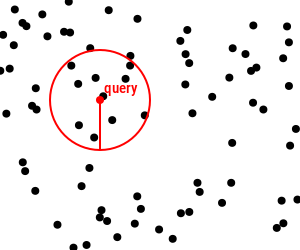

In [105]:
@png begin
    origin(0, 0)
    for i in 1:100
        p = Point(rand() * 300, rand() * 300)
        circle(p, 4, :fill)
    end
    fontsize(15)
    sethue("red")
    q = Point(100, 100)
    circle(q, 4, :fill)
    r = 50
    circle(q, r, :stroke)
    line(q, q + (0, r), :stroke)
    label("query", :NE, q)
    #rulers()
    end 300 250 "query.png"

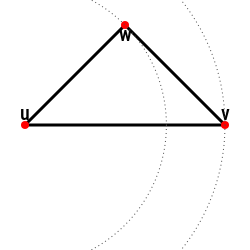

In [74]:
@png begin
    #origin(100, 100)

    P = [Point(-100, 0), Point(100, 0), Point(0, -100)]
    L = ["u", "v", "w"]

    setline(3)
    fontsize(20)
    sethue("black")
    label.(L, (:N, :N, :S), P)
    line(P[1], P[2], :stroke)
    line(P[1], P[3], :stroke)
    line(P[2], P[3], :stroke)
    
    sethue("red")
    circle.(P, 4, :fill)
    
    setdash("dot")
    sethue("gray30")
    setline(1)
    circle(P[1], distance(P[1], P[2]), :stroke)
    circle(P[1], distance(P[1], P[3]), :stroke)

    #rulers()
    end 250 250 "triangle.png"

In [118]:
using SimilaritySearch, StatsPlots

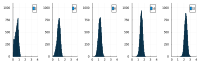

In [161]:
n = 10_000
dist = L2Distance()
H = []
DIMS = [2, 4, 8, 16, 32]
for dim in DIMS
    q = rand(dim)
    D = [evaluate(dist, q, rand(dim)) for i in 1:n]
    h = histogram(D, size=(250, 250), bins=50, xlims=(0, 4), ylims=(0, 1100), label="$dim")
    #display(h)
    push!(H, h)
    #savefig("distances-$dim.png")
end

plot(H..., layout=(1, length(H)), size=(800, 250)) |> display
#histogram(H, layout=(1, length(H)), size=(800, 250), bins=100, title="distances", xlim=(4, 4, 4, 4, 4), label=DIMS)
savefig("distances.png")